In [ ]:
import os 
import pandas as pd
import numpy as np
import datetime as dt
# import ee
# import geemap as geemap
from IPython.display import HTML

import panel as pn
# import param
import plotly.express as px
import plotly.graph_objects as go
# import folium
# from folium import plugins


from meteostat import Point, Daily

pn.extension('plotly')

In [ ]:
%load_ext google.cloud.bigquery

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../gbif-challenge-953ed382a2dd.json' ##change this

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

In [ ]:
# %%bigquery df_bq
# SELECT
#     *
# FROM `gbif-challenge.airflow_uploads.gbif_combined`
# WHERE DATE(eventDate) = "2022-04-04"
# ee.Initialize()

In [ ]:
def get_species_names():
    sql = f"""
     SELECT COUNT(*) as occ_count, genericName,country FROM `gbif-challenge.airflow_uploads.gbif_combined` GROUP BY genericName,country ORDER BY country,genericName
    """
    bq = client.query(sql).to_dataframe() 
    return bq.dropna()
    

In [ ]:
# Drop Down Species Filter 

if os.path.exists( os.getcwd() + "/species_names.csv"):
    df_species_names = pd.read_csv( os.getcwd() + "/species_names.csv")
else:
    df_species_names = get_species_names()
    df_species_names.to_csv(os.getcwd() + "/species_names.csv", index=False)
    


In [84]:
df = pd.read_csv("/Users/riteshtekriwal/Work/Data/Raw/bio-conservation/test_combined.csv")
# df = pd.read_csv("gbif_combined.csv")

df.columns

        ## filter the dataframe to the selected point
# df = df.query(query)
df = pd.melt(df, value_vars=['tavg', 'tmin', 'tmax','prcp','wspd','wdir'])
fig = px.treemap(df, path=['variable'], values='value')
fig.data[0].textinfo = 'label+value'

level = 1 # write the number of the last level you have
lvl_clr = "#5cb25d"
font_clr = "black"

fig.data[0]['marker']['colors'] =[lvl_clr for sector in fig.data[0]['ids'] if len(sector.split("/")) == level]
fig.data[0]['textfont']['color'] = [font_clr  for sector in fig.data[0]['ids'] if len(sector.split("/")) == level]

fig.data[0]['textfont']['size'] = 30

fig.show()
# df.head()

# df.head(100)

In [86]:
df.to_csv('/Users/riteshtekriwal/Work/GitClones/bio-conservation/dashboard/weather.csv', index = False)

In [ ]:
df=  df[df['country'] == 'Brazil']
x = df['species'].value_counts().rename_axis('Species').reset_index(name='Occurence Count')

# x = x.rename(columns = {'index':'species_name'})
x = x.sort_values(by = ['Occurence Count'],ascending=[False])
x.head(10)

In [ ]:

fig = px.bar(
    x.head(10),
    x = 'Occurence Count',
    y="Species",
    color_discrete_sequence=['#5cb25d'],
    text = 'Occurence Count',
    title = 'Occurence Counts for window <>'
    )
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    })

fig

In [14]:
df['point_size'] = 10


fig = px.scatter_mapbox(
        df[df['species']=="Trichonephila clavipes"],
        lat="decimalLatitude",
        lon="decimalLongitude",
        color="species",
        hover_name= 'genericName',
        size = 'point_size',
        hover_data= ['species','decimalLongitude','decimalLatitude'],
        # color_discrete_sequence=['#5cb25d'],
        # color_continuous_scale=px.colors.cyclical.IceFire,
        zoom=6,
        mapbox_style="open-street-map")

    # fig.update_layout(showlegend=False) 
# fig.update_layout({
#     'plot_bgcolor': 'rgba(0, 0, 0, 0)',
#     'paper_bgcolor': 'rgba(0, 0, 0, 0)',
#     })

fig.update_layout(
        # title='Geo Spatial Occcurence Instances for <>',
        autosize=True,
        hovermode='closest',
        margin={"r":0,"t":0,"l":0,"b":0},
        template="plotly_white",
        showlegend=False)

fig.update_layout(
        updatemenus=[
            dict(
                type = "buttons",
                direction = "left",
                buttons=list([
                    dict(
                        args=["hover_name", "size"],
                        label="Occurence",
                        method="update"
                    ),
                    dict(
                        args=["hover_name", "prcp"],
                        label="Soil",
                        method="update"
                    )
                ]),
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.11,
                xanchor="left",
                y=1.1,
                yanchor="top"
            ),
        ]
    )

    # Add annotation
fig.update_layout(
        annotations=[
            dict(text="Trace type:", showarrow=False,
                                x=0, y=1.06, yref="paper", align="left")
        ]
    )

fig

In [75]:
df[df['species']=="Trichonephila clavipes"].columns

Index(['Unnamed: 0', 'key', 'publishingCountry', 'basisOfRecord',
       'occurrenceStatus', 'scientificName', 'acceptedScientificName',
       'kingdom', 'phylum', 'order', 'family', 'genus', 'species',
       'genericName', 'specificEpithet', 'taxonRank', 'taxonomicStatus',
       'iucnRedListCategory', 'decimalLongitude', 'decimalLatitude',
       'coordinateUncertaintyInMeters', 'eventDate', 'issues', 'class',
       'countryCode', 'country', 'datasetName', 'avg_radiance',
       'avg_deg_urban', 'is_invasive', 'land_cover_label', 'tavg', 'tmin',
       'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'phh2o_0_5cm_mean', 'bdod_0_5cm_mean', 'cec_0_5cm_mean',
       'cfvo_0_5cm_mean', 'clay_0_5cm_mean', 'nitrogen_0_5cm_mean',
       'sand_0_5cm_mean', 'silt_0_5cm_mean', 'soc_0_5cm_mean',
       'ocd_0_5cm_mean'],
      dtype='object')

In [104]:
df.head(1)

,variable,value
0,tavg,NaN


In [78]:
df['soc_0_5cm_mean']=df['soc_0_5cm_mean']*0.1
df['nitrogen_0_5cm_mean']=df['nitrogen_0_5cm_mean']*0.01

x = pd.melt(
            df.head(1),
            value_vars=['clay_0_5cm_mean',
                        'silt_0_5cm_mean',
                        'sand_0_5cm_mean',
                        'soc_0_5cm_mean',
                        'nitrogen_0_5cm_mean']
            )

x = x.dropna()


,variable,value
0,clay_0_5cm_mean,189.00
1,silt_0_5cm_mean,198.00
2,sand_0_5cm_mean,615.00
3,soc_0_5cm_mean,21.60
4,nitrogen_0_5cm_mean,14.44


In [79]:
x.to_csv("/Users/riteshtekriwal/Work/GitClones/bio-conservation/dashboard/soil_temp.csv",index=False)


In [50]:
fig = px.pie(
    x,
    values='value',
    names='variable',
    title='Soil Compositon %',
    hole=.25)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()
# fig.show()

In [69]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    # labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    # parents=[""  , "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    labels=["CoVariates", "Water", "Soil", "Temperature","LandCover","Clay","Silt","Sand"],
    parents=[""  , "CoVariates", "CoVariates", "CoVariates", "CoVariates", "Soil", "Soil", "Soil" ],
    values=[0, 25, 25, 25, 25,10,5,10],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [47]:
list(x['value'])

[189.0, 198.0, 615.0, 21600.0, 14.44]

In [ ]:
#### all the filter widgets we need
# latitude = pn.widgets.FloatInput(name='Latitude', value=5., step=1e-1, 
#                                  start=min(df.decimalLatitude), end=max(df.decimalLatitude), width=150)
# longitude = pn.widgets.FloatInput(name='Longitude', value=5., step=1e-1,
#                                   start=min(df.decimalLongitude), end=min(df.decimalLongitude), width=150)


event_date = pn.widgets.DateRangeSlider(
    name='Date Range',
    start=min(pd.to_datetime(df['eventDate'])), end=max(pd.to_datetime(df['eventDate'])),
    value=(dt.date(2021, 1, 1), dt.date(2021, 12, 1)),
)
# pn.widgets.DatePicker(,)
country_list = (list(df_species_names.country.unique()))
country = pn.widgets.Select(name='Country',width = 300, options=country_list)

# species = pn.widgets.AutocompleteInput(
#     name = 'Species',
#     # width=400,
#     options=sorted(list(df_species_names[df_species_names["country" ]== country.value].genericName.dropna().unique())),
#     min_characters = 1,
#     case_sensitive=False,
#     placeholder='Enter your Species')
species_list = ['All']+ (list(df_species_names[df_species_names["country" ]== country.value].genericName.unique()))
species = pn.widgets.Select(
    name='Species',
    width= 400,
    options=species_list)
@pn.depends(country.value, watch=True)
def _update_species(country):
    species.options =  list(df_species_names[df_species_names["country" ]== country.value].genericName.dropna().unique()).sort()
    species.value = list(df_species_names[df_species_names["country" ]== country.value].genericName.dropna().unique()).sort()[0]





# print("============Country:%s" % (country.value))

button = pn.widgets.Button(name='Update Plots', width= 200, button_type='success')


#### all our plot functions
### the world map view of occurrence data
def occ_plot(df=df):
    # fig = px.scatter_geo(df, lat="decimalLatitude", lon='decimalLongitude', color='species')
    # ## making the background transparent below
    # fig.update_layout({
    # 'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    # 'paper_bgcolor': 'rgba(0, 0, 0, 0)'
    # },
    # margin=dict(t=0, b=0, l=0, r=0))

    # fig = folium.Map(location=[df['decimalLatitude'].mean(), df['decimalLongitude'].mean()],
    #                 zoom_start=5, control_scale=True,prefer_canvas=True)
    # # folium.Circle().add_to(m)


    # for i in range(0,len(df)):
    #     folium.Circle(
    #         location=[df.iloc[i]['decimalLatitude'], df.iloc[i]['decimalLongitude']],
    #         popup=df.iloc[i]['acceptedScientificName'],
    #         radius=1000,
    #         # color=df.iloc[i]['acceptedScientificName'],
    #         # fill=True,
    #         color='r',
    #         # fill_color=colordict[index],
    #         fill_opacity=0.7,
    #         fill=True,
    #         # fill_color='red'
    #     ).add_to(fig)

    # folium.LayerControl().add_to(fig)

    # minimap = plugins.MiniMap(toggle_display=True)

    # m.add_child(minimap)
    # add full screen button to map
    # plugins.Fullscreen(position='topright').add_to(fig)
    # draw = plugins.Draw(export=True)
    # add draw tools to map
    # draw.add_to(fig)


    df = df.head(500)
    df['point_size'] = 15
    fig = px.scatter_mapbox(
        df,
        lat="decimalLatitude",
        lon="decimalLongitude",
        color="genericName",
        color_continuous_scale=px.colors.cyclical.IceFire,
        size = 'point_size',
        zoom=5,
        mapbox_style="open-street-map")

    fig.update_layout(showlegend=False) 

    
    return fig

## create the world scatter plot
plot_scatter = pn.pane.Plotly(occ_plot(),width= 1050, height= 550)


## function for creating the treemap to show specific point wise values 
def create_cards(df, query=None):
    if query:
        ## filter the dataframe to the selected point
        df = df.query(query)
        df = pd.melt(df, value_vars=['avg_radiance', 'is_invasive', 'avg_deg_urban'])
        fig = px.treemap(df, path=['variable'], values='value')
        fig.data[0].textinfo = 'label+value'

        level = 1 # write the number of the last level you have
        lvl_clr = "#5cb25d"
        font_clr = "black"

        fig.data[0]['marker']['colors'] =[lvl_clr for sector in fig.data[0]['ids'] if len(sector.split("/")) == level]
        fig.data[0]['textfont']['color'] = [font_clr  for sector in fig.data[0]['ids'] if len(sector.split("/")) == level]

        fig.data[0]['textfont']['size'] = 30
        return  fig


###instantiate the cards plot
plot_cards = pn.pane.Plotly(create_cards(df, f'decimalLatitude == -22.258903'), width=400, height=400)


## function for creating the treemap to show specific point wise values 
def create_trends(df, query=None):
    if query:
        ## filter the dataframe to the selected point
        df = df.query(query)
        
        print(df.eventDate)
        start = dt.datetime(2018, 1, 1)
        end = dt.datetime(2018, 12, 31)

        # Create Point for Vancouver, BC
#         pt = Point(df.loc[0,'decimalLatitude'], df.loc[0,'decimalLongitude'], 0)
        pt = Point(53.033981, -1.380991, 0)

        # Get daily data for 2018
        data = Daily(pt, start, end)
        data = data.fetch().reset_index(level=0)
        if data.shape[0] > 0:
            fig = px.line(data, x='time', y='tavg', template='plotly_white',
                          title='Climate Covariates')
            fig.update_layout(width=600)
            return  fig


###instantiate the cards plot
plot_trends = pn.pane.Plotly(create_trends(df, f'decimalLatitude == -22.258903'), width=400, height=400)

## display data, can delete
cols = ['decimalLatitude','decimalLongitude', 'eventDate', 'species']
display_data = pn.widgets.DataFrame(df[cols].head(5))

## dependent hidden function to run when a point is clicked in the plot_scatter
@pn.depends(plot_scatter.param.click_data, watch=True)
def _update_after_click_on_1(click_data):
    if click_data !=None:
        lat = click_data['points'][0]['lat']
        lon = click_data['points'][0]['lon']
        plot_cards.object = create_cards(df, f'decimalLatitude == {lat}')


def query(start="2022-04-04", end="2022-04-04", country='', species = ''):

    # sql = f"""
    # SELECT
    #     *
    # FROM `gbif-challenge.airflow_uploads.gbif_combined`
    # WHERE DATE(eventDate) BETWEEN "{start}" AND "{end}" AND country in ("{country}") AND genericName in ("{species}")" 
    # """

    if species is not 'All':
        sql = f"""
        SELECT
            *
        FROM `gbif-challenge.airflow_uploads.gbif_combined`
        WHERE country in ("{country}") AND genericName in ("{species}")
        """

        print(sql)

        bq = client.query(sql).to_dataframe() 
    else :
        bq = df.copy()
    return bq
    
def fetch_data(start="2022-04-04", end="2022-04-04"):
    global df, cols
    if button.clicks > 0:
        bq = query(event_date.value[0].strftime('%Y-%m-%d'), event_date.value[0].strftime('%Y-%m-%d'), country=country.value, species=species.value) ###change this to 1
        df = bq.copy()
        plot_scatter.object = occ_plot(df)
        plot_cards.object = create_cards(df, f"decimalLatitude == {df.loc[0,'decimalLatitude']}")
        plot_trends.object = create_trends(df, f"decimalLatitude == {df.loc[0,'decimalLatitude']}")

        plot_species.object = species_counts(df)
        display_data.value = df[cols]
        
### placeholder histogram plot of species counts
def species_counts(df=df):
    fig = px.histogram(df, y="species",color_discrete_sequence=['#5cb25d'])
    fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
    })
    return fig
    
plot_species = pn.pane.Plotly(species_counts())


button.on_click(fetch_data)

In [ ]:
## The main template to render, sidebar for text

template = pn.template.FastGridTemplate(
    title="🌏 GBIF Powered by Covariates",
#     sidebar=["We are interested bleh bleh bleh",
#              pn.pane.Markdown("## Select Filters"), latitude, longitude,
#              '', event_date, '', species, '', country, button],
    header = ['<a href="https://github.com/tekritesh/bio-conservation/tree/main">About</a>'],
    sidebar=["""We are interested bleh bleh bleh.\n We will hunt you down if you harm ANY flora or fauna."""],
    accent = '#5cb25d', sidebar_width = 280, background_color = '#f5f5f5',
    neutral_color = '#ffffff',
    corner_radius = 15
)

### specify which portion of the main page grid you want to place a plot in

template.main[:1, :] = pn.Row(
    # pn.Column(latitude, longitude),
                              pn.Column(country),
                              pn.Column(species),
                            #   event_date,
                              pn.Column(button))

template.main[1:5, :]=pn.Tabs(('GBIF',pn.Column(plot_scatter)),
                              ('Radiance', pn.pane.HTML(HTML('map1.html'), width=600)), dynamic=True)

template.main[5:9, :4] = pn.Column(plot_cards)

template.main[5:9, 6:12]= pn.Column('### Species Counts', plot_species, height=400)
template.main[9:11, :]= pn.Column(display_data, height=300, width = 1000)

template.main[11:13, :] = pn.Column(plot_trends)



###color examples
##77cb
#'#faad55'
#'#f0a3bc'
#a18dd6

In [ ]:
## tells the terminal command to run the template variable as a dashboard

template.servable();

In [ ]:
####extra code

# center_lat = -3.497341
# center_lon = 38.642394

# zoomlevel=15

# get December image, we're using the "avg_rad" band
# viirs2020_01 = ee.ImageCollection("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG").filterDate("2022-01-01","2022-01-31").select('avg_rad').median()


# initialize our map
# map1 = geemap.Map()
# map1.addLayer(viirs2020_01, {}, "VIIRS-DNB")
#map1.to_html('map1.html')

# def get_map(lat=20.5936832, long=78.962883, zoom_start=5):
#     mm = fm.Map(location=[lat,long], zoom_start=zoom_start)
#     return mm

# map = get_map()


# @pn.depends(button.param.clicks, watch=True)
# def fetch_data(clicks,start="2022-04-04", end="2022-04-04"):
#     ##de = "2022-04-04"\
#     #end = event_date.value[0].strftime('%Y-%m-%d')
#     cols = ['decimalLatitude','decimalLongitude', 'eventDate', 'species']
#     if clicks > 0:
#         global df
#         sql = f"""
#         SELECT
#             *
#         FROM `gbif-challenge.airflow_uploads.gbif_combined`
#         WHERE DATE(eventDate) BETWEEN "{start}" AND "{end}"
#         """
#         bq = client.query(sql).to_dataframe() 
#         plot_scatter.object = occ_plot(bq)
#         plot_cards.object = create_cards(bq, f"decimalLatitude == {bq.loc[0,'decimalLatitude']}")
#         plot_species.object = species_counts(bq)
#         df = bq.copy()
#         return pn.widgets.DataFrame(df[cols].head(20))
    

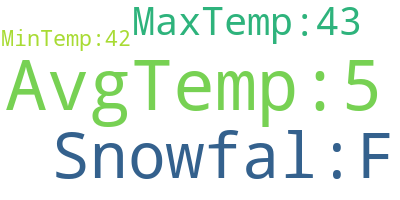

In [103]:
from wordcloud import WordCloud
df1 = pd.DataFrame({
    'Title': ['MaxTemp:43','MinTemp:42','AvgTemp:5','Snowfal:F'],
    'Count': [0.1,0.1,0.5,0.4,]})
d = {a: x for a, x in df1.values}
wc = WordCloud(background_color='white', width=400, height=200)
wc.fit_words(d)
wc.to_image()

In [106]:
df = pd.read_csv("/Users/riteshtekriwal/Work/Data/Raw/bio-conservation/test_combined.csv")
df.head(1)
df = pd.melt(df.head(1), value_vars=['land_cover_label', 'snow', 'is_invasive','species'])
df['count']=[1,1,1,4]

df

,variable,value
0,land_cover_label,trees
1,snow,NaN
2,is_invasive,False
3,species,Rupornis magnirostris
